In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("data_v6.csv")

In [4]:
df.keys()

Index(['Name', 'CVR', 'BusinessAddress', 'StartDate', 'Status', 'IndustryCode',
       'IndustryName', 'Area', 'AreaCode', 'NumEmployees', 'DirectorName',
       'DirectorAddress', 'DirectorId', 'RegisteredCapital',
       'RegisteredCapitalCurrency', 'NumPeople', 'NumCars',
       'DistanceToBusinessMeters', 'DistanceToBusinessDriveSeconds',
       'DirectorAddressLatitude', 'DirectorAddressLongitude ',
       'BusinessAddressLatitude', 'BusinessAddressLongitude', 'StartYear',
       'StartDecade', 'IndustryShortCode', 'IndustryGroup'],
      dtype='object')

d:\Users\Simon\anaconda3\envs\DataInTheWild\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Simon\anaconda3\envs\DataInTheWild\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


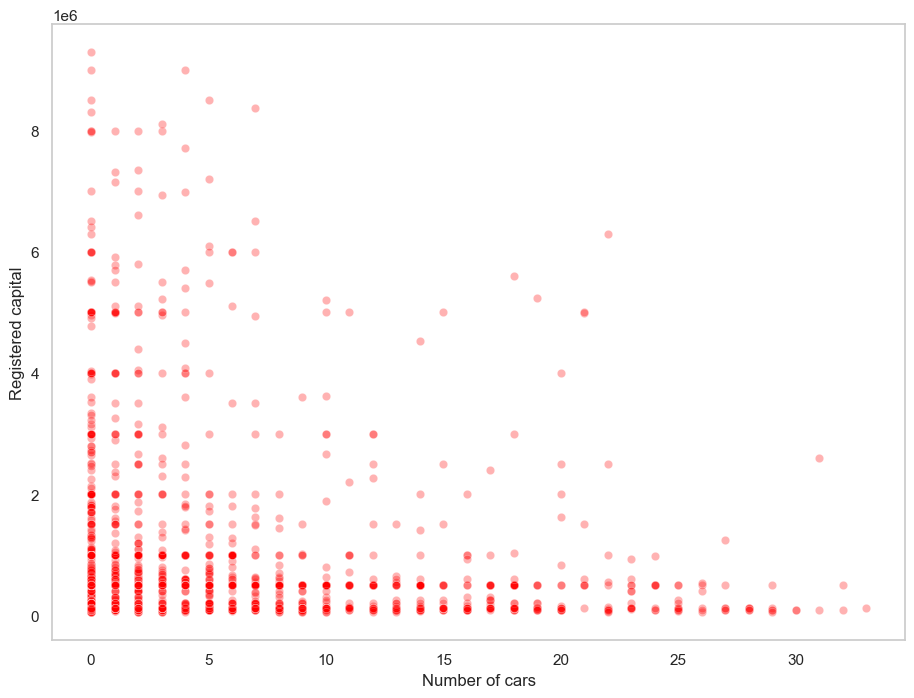

In [5]:
# Plot two scatterplots side by side showing NumCars and NumPeople (respectively) on x-axis vs registered capital on y-axis
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
ax = sns.scatterplot(x=df["NumCars"], y=df["RegisteredCapital"], alpha=0.3, color="red")
ax.set(xlabel='Number of cars', ylabel='Registered capital')
ax.grid(False)


d:\Users\Simon\anaconda3\envs\DataInTheWild\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Simon\anaconda3\envs\DataInTheWild\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


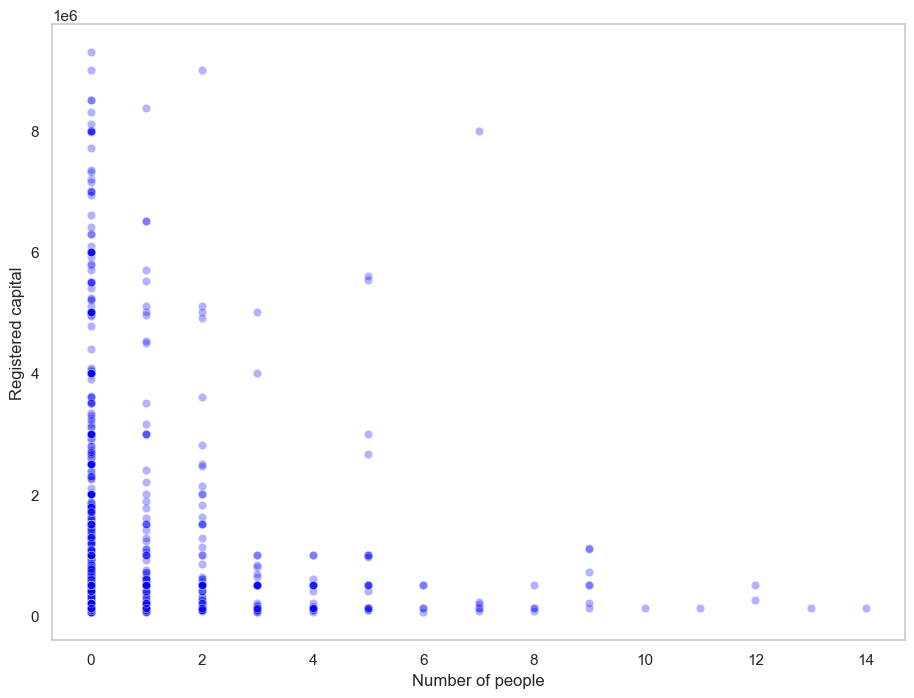

In [6]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
ax = sns.scatterplot(x=df["NumPeople"], y=df["RegisteredCapital"], alpha=0.3, color="blue")
ax.set(xlabel='Number of people', ylabel='Registered capital')
ax.grid(False)

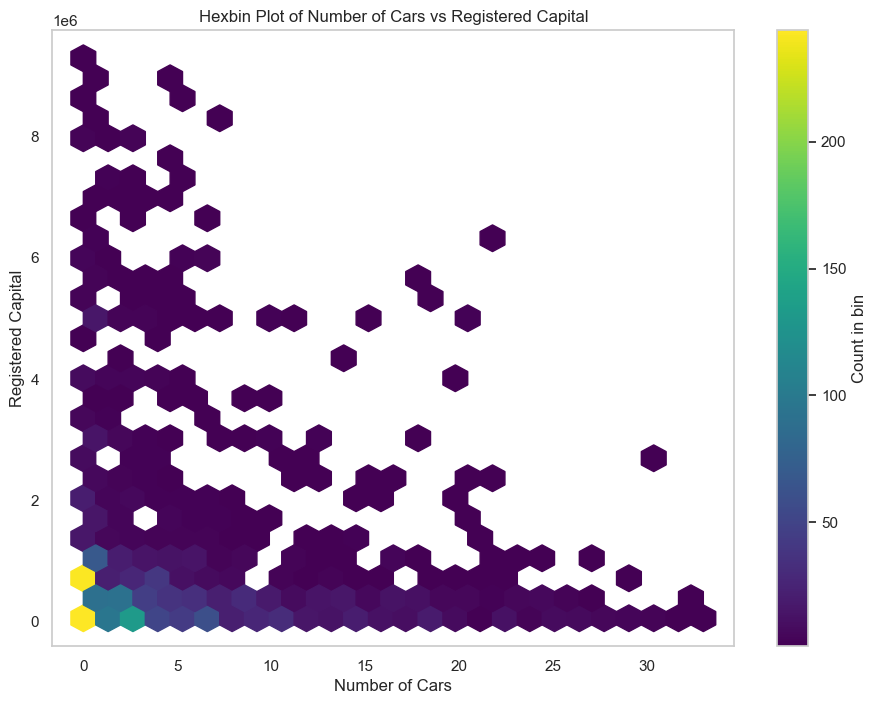

In [7]:
# Set style and figure size
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")

# Creating a hexbin plot with Viridis color palette
plt.hexbin(x=df["NumCars"], y=df["RegisteredCapital"], gridsize=25, cmap='viridis', mincnt=1)
plt.colorbar(label='Count in bin')

# Set labels and title
plt.xlabel('Number of Cars')
plt.ylabel('Registered Capital')
plt.title('Hexbin Plot of Number of Cars vs Registered Capital')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

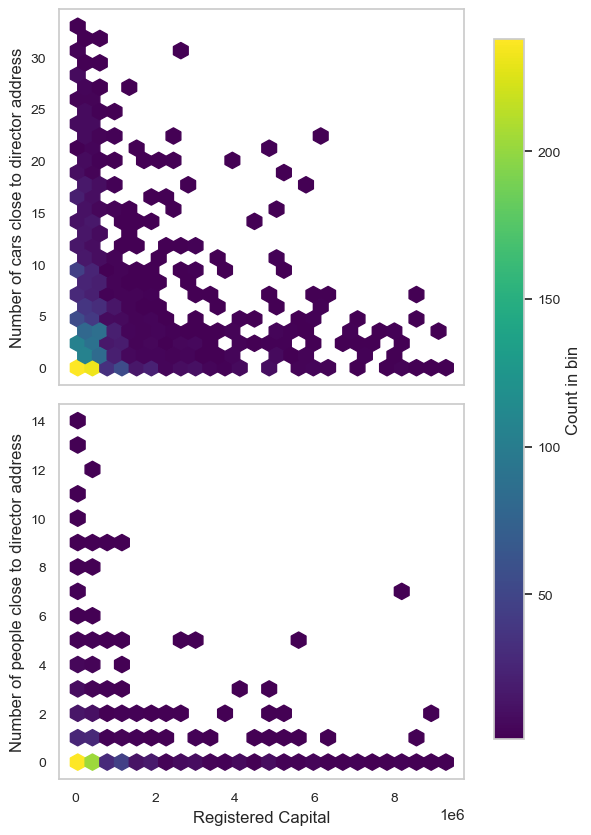

In [8]:
# Set style
sns.set(style="whitegrid")
palette = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Create a figure with two subplots vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))  # Adjusted figsize

# Hexbin plot for Registered Capital vs Number of Cars
hb1 = ax1.hexbin(x=df["RegisteredCapital"], y=df["NumCars"], gridsize=25, cmap='viridis', mincnt=1)
# same as above, but using the dark_palette as cmap

ax1.set_ylabel('Number of cars close to director address', fontsize=12)
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(False)

# Hexbin plot for Registered Capital vs Number of People
hb2 = ax2.hexbin(x=df["RegisteredCapital"], y=df["NumPeople"], gridsize=25, cmap='viridis', mincnt=1)
ax2.set_xlabel('Registered Capital', fontsize=12)
ax2.set_ylabel('Number of people close to director address', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.grid(False)

# Adjust layout for colorbar space and reduce spacing between plots
plt.subplots_adjust(right=0.8, hspace=0.05)  # Adjust hspace as needed

# Add a color bar
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Adjust these values as needed for layout
fig.colorbar(hb1, cax=cbar_ax, label='Count in bin')
cbar_ax.tick_params(labelsize=10)

# Show the plot
plt.show()

(2169, 27)
(2165, 27)
Number of companies with employees > 200: 4
634     284
1307    867
1328    217
1596    318
Name: NumEmployees, dtype: int64


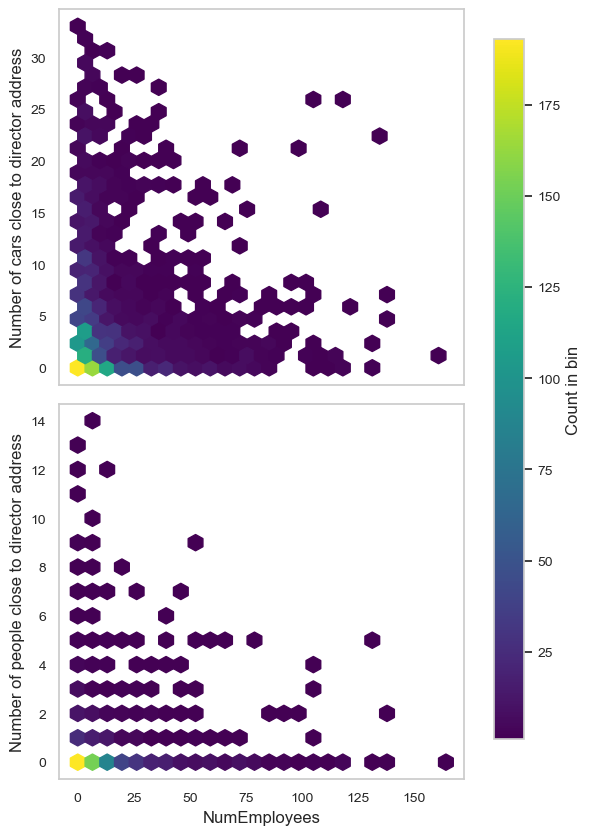

In [9]:
# Set style
sns.set(style="whitegrid")
print(df.shape)
# create copy of df with companies over 500 employees removed
df2 = df[df.NumEmployees < 200]
print(df2.shape)
# Print count of companies with employees > 200 and their number of employees pretty printed
print("Number of companies with employees > 200: {}".format(df[df.NumEmployees > 200].shape[0]))
print(df[df.NumEmployees > 200].NumEmployees)

# Create a figure with two subplots vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))  # Adjusted figsize

# Hexbin plot for Registered Capital vs Number of Cars
hb1 = ax1.hexbin(x=df2["NumEmployees"], y=df2["NumCars"], gridsize=25, cmap='viridis', mincnt=1)
ax1.set_ylabel('Number of cars close to director address', fontsize=12)
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(False)

# Hexbin plot for Registered Capital vs Number of People
hb2 = ax2.hexbin(x=df2["NumEmployees"], y=df2["NumPeople"], gridsize=25, cmap='viridis', mincnt=1)
ax2.set_xlabel('NumEmployees', fontsize=12)
ax2.set_ylabel('Number of people close to director address', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.grid(False)

# Adjust layout for colorbar space and reduce spacing between plots
plt.subplots_adjust(right=0.8, hspace=0.05)  # Adjust hspace as needed

# Add a color bar
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Adjust these values as needed for layout
fig.colorbar(hb1, cax=cbar_ax, label='Count in bin')
cbar_ax.tick_params(labelsize=10)

# Show the plot
plt.show()

In [15]:
# Create dataframe from df where NumEmployees, RegisteredCapital, NumCars, and NumPeople have been z-score normalized
df_norm = df.copy()
df_norm["NumEmployees"] = (df["NumEmployees"] - df["NumEmployees"].mean()) / df["NumEmployees"].std()
df_norm["RegisteredCapital"] = (df["RegisteredCapital"] - df["RegisteredCapital"].mean()) / df["RegisteredCapital"].std()
df_norm["NumCars"] = (df["NumCars"] - df["NumCars"].mean()) / df["NumCars"].std()
df_norm["NumPeople"] = (df["NumPeople"] - df["NumPeople"].mean()) / df["NumPeople"].std()

# Remove outliers from df_norm (abs(z-score) > 3)
df_norm = df_norm[(np.abs(df_norm.NumEmployees) < 3) & (np.abs(df_norm.RegisteredCapital) < 3) & (np.abs(df_norm.NumCars) < 3) & (np.abs(df_norm.NumPeople) < 3)]

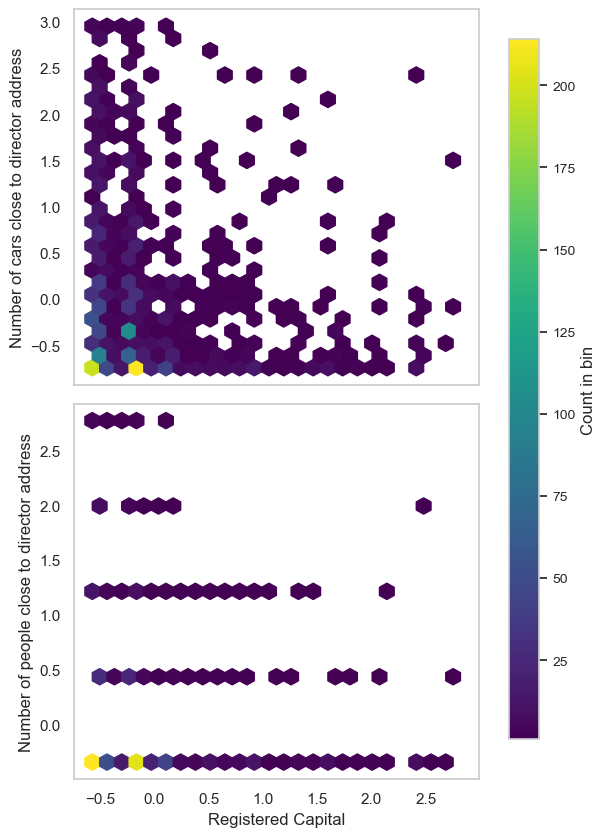

In [19]:
# Set style
sns.set(style="whitegrid")

# Create a figure with two subplots vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))  # Adjusted figsize

# Hexbin plot for Registered Capital vs Number of Cars
hb1 = ax1.hexbin(x=df_norm["RegisteredCapital"], y=df_norm["NumCars"], gridsize=25, cmap='viridis', mincnt=1)
# same as above, but using the dark_palette as cmap

ax1.set_ylabel('Number of cars close to director address', fontsize=12)
ax1.set_xticklabels([])
ax1.grid(False)

# Hexbin plot for Registered Capital vs Number of People
hb2 = ax2.hexbin(x=df_norm["RegisteredCapital"], y=df_norm["NumPeople"], gridsize=25, cmap='viridis', mincnt=1)
ax2.set_xlabel('Registered Capital', fontsize=12)
ax2.set_ylabel('Number of people close to director address', fontsize=12)
ax2.grid(False)

# Adjust layout for colorbar space and reduce spacing between plots
plt.subplots_adjust(right=0.8, hspace=0.05)  # Adjust hspace as needed

# Add a color bar
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Adjust these values as needed for layout
fig.colorbar(hb1, cax=cbar_ax, label='Count in bin')
cbar_ax.tick_params(labelsize=10)

# Show the plot
plt.show()